In [1]:
import os 
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


2024-02-26 04:35:23.215297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-26 04:35:23.215474: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-26 04:35:23.382662: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset')):
    subfolder_path = os.path.join('/kaggle/input/alzheimers-dataset-4-class-of-images/Alzheimer_s Dataset', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 2/2 [00:01<00:00,  1.37it/s]


image             label
0     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
1     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
2     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
3     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
4     /kaggle/input/alzheimers-dataset-4-class-of-im...  ModerateDemented
...                                                 ...               ...
6395  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6396  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6397  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6398  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented
6399  /kaggle/input/alzheimers-dataset-4-class-of-im...      MildDemented

[6400 rows x 2 columns]

In [ ]:
# data visulaization

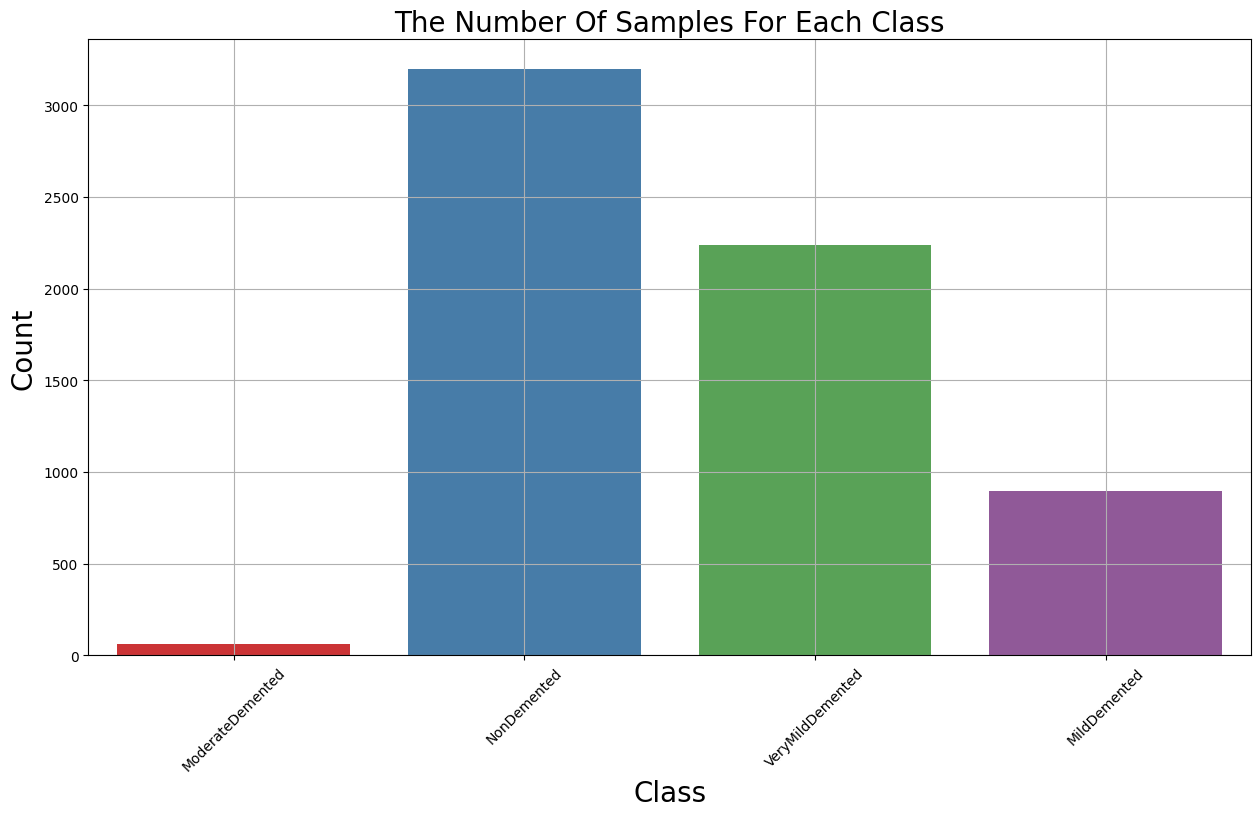

In [3]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x=df.label,palette='Set1')
ax.set_xlabel("Class",fontsize=20)
ax.set_ylabel("Count",fontsize=20)
plt.title('The Number Of Samples For Each Class',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

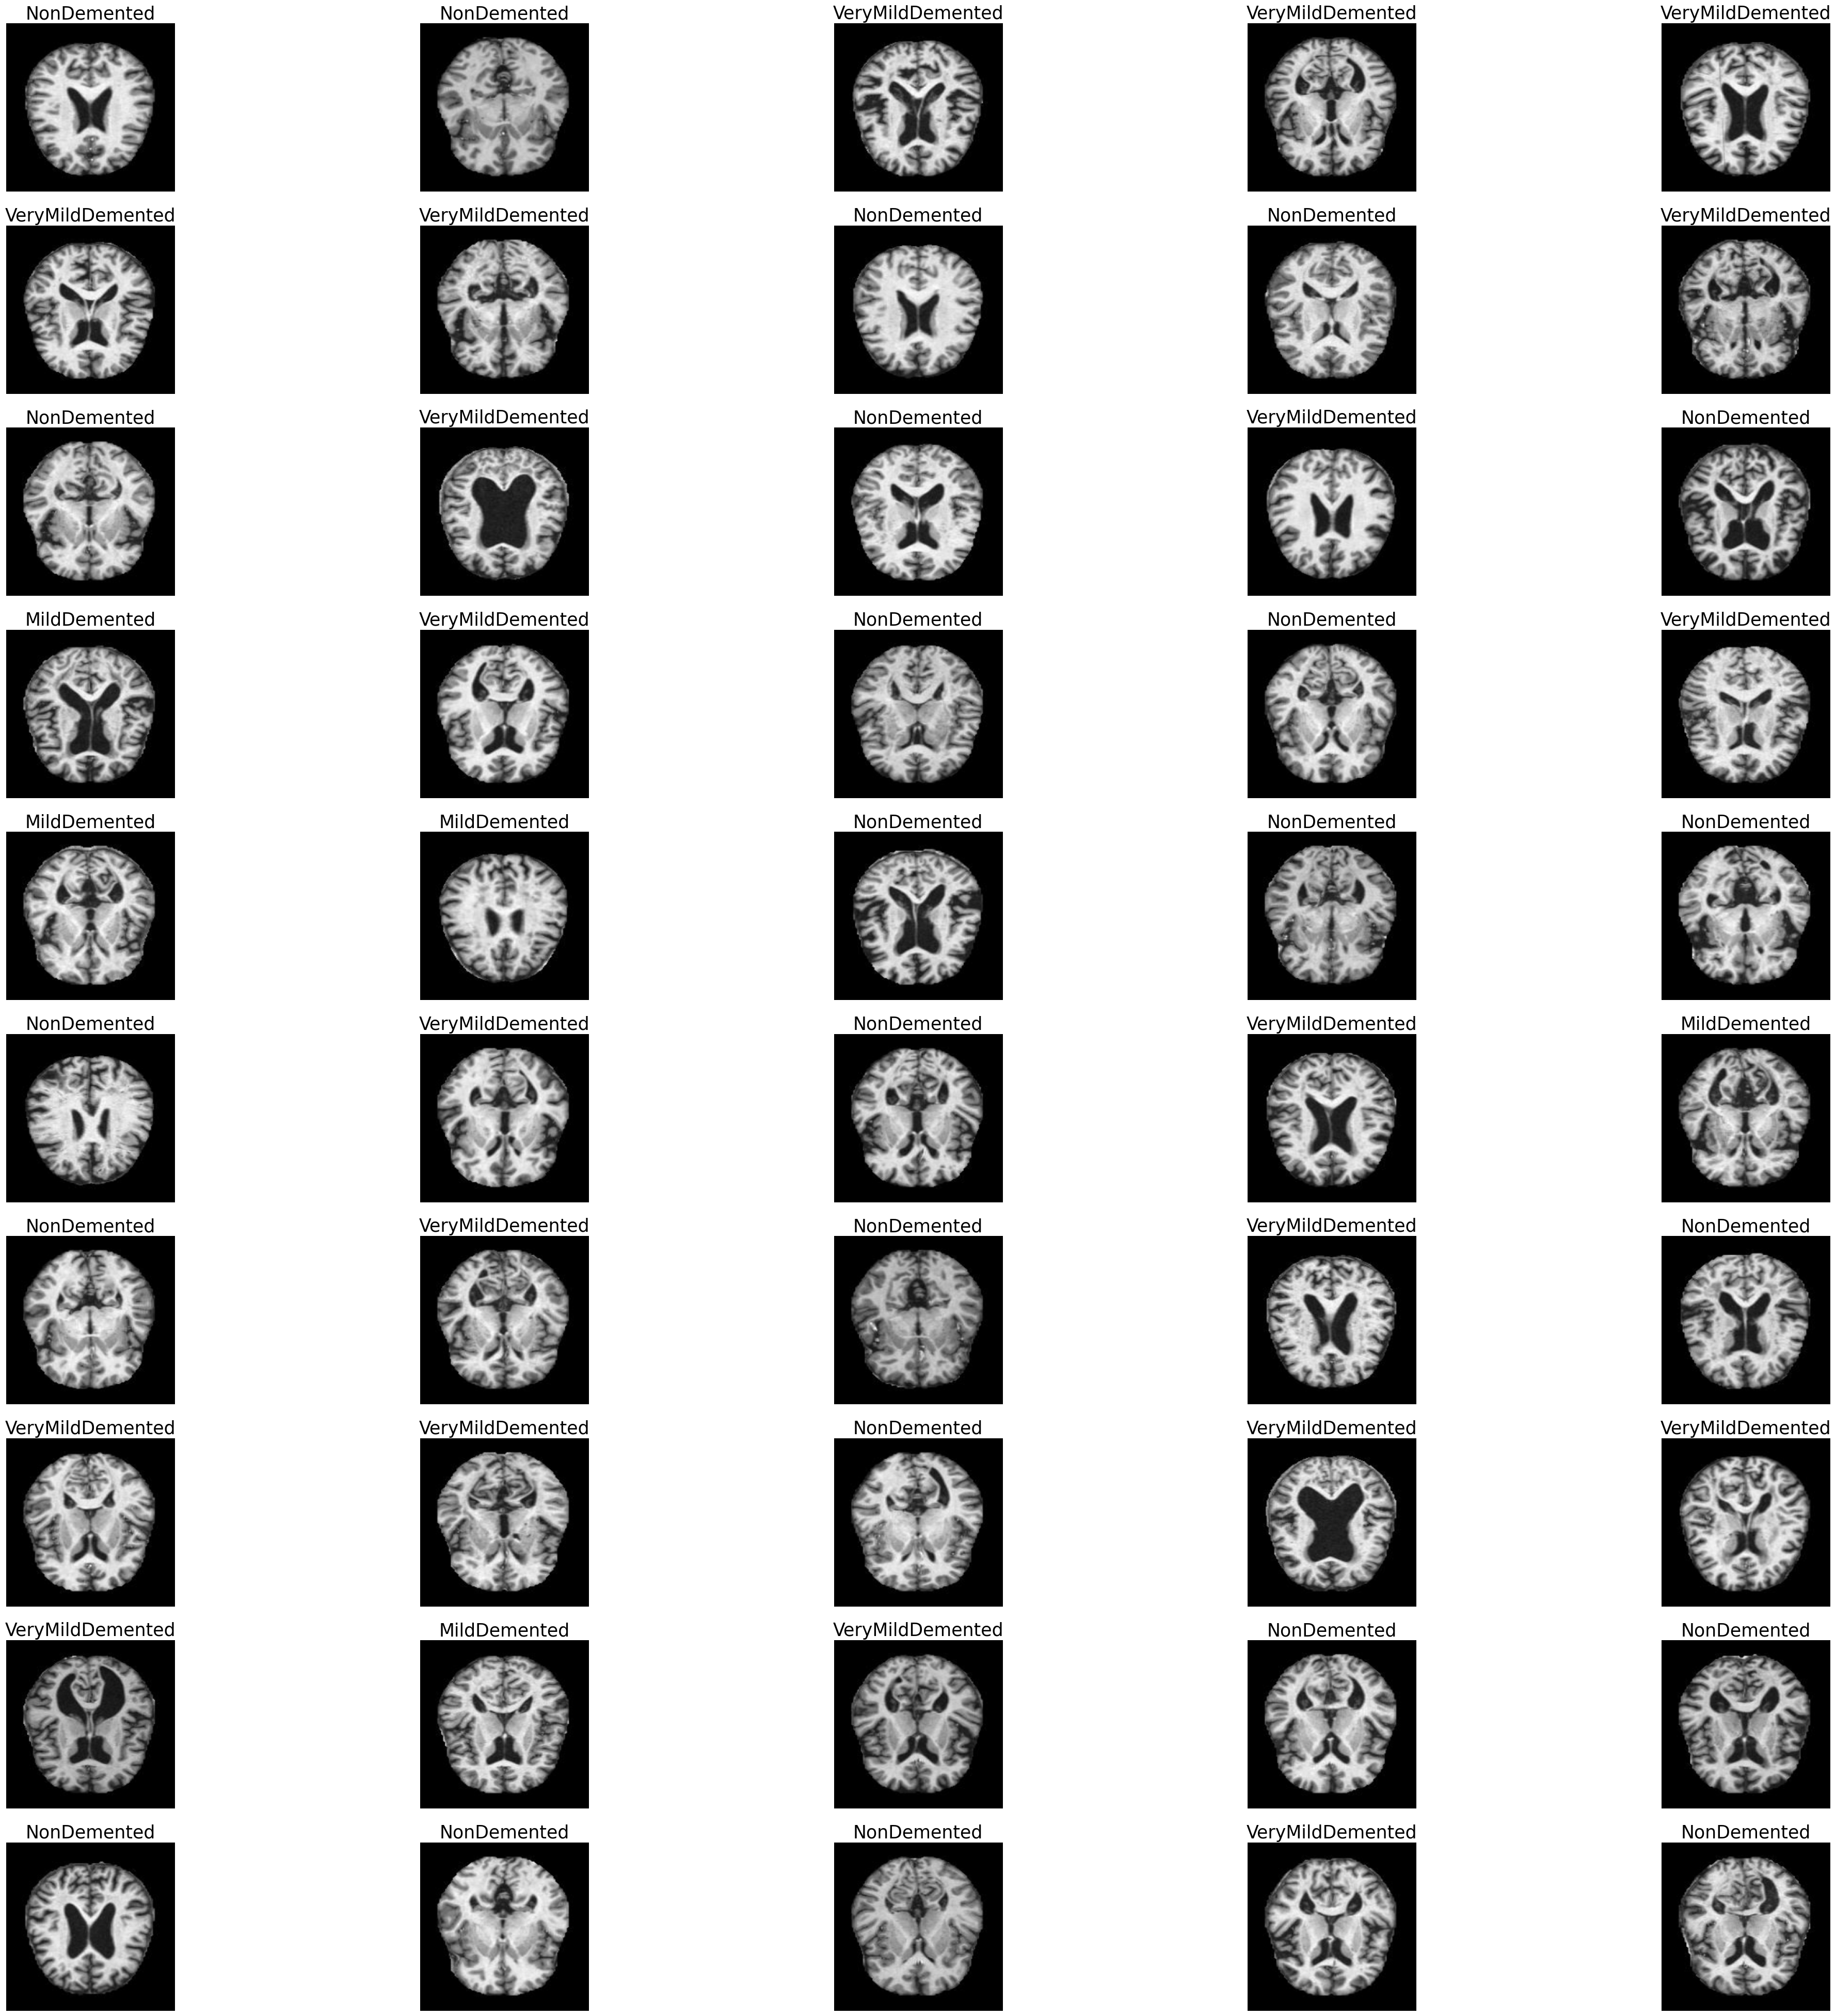

In [4]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(df),50)):
    plt.subplot(10,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=25)

In [ ]:
#Dataa Augmnetation

In [5]:
Size=(176,176)
work_dr = ImageDataGenerator(
    rescale = 1./255
)
train_data_gen = work_dr.flow_from_dataframe(df,x_col='image',y_col='label', target_size=Size, batch_size=6500, shuffle=False)

Found 6400 validated image filenames belonging to 4 classes.


In [6]:
train_data, train_labels = train_data_gen.next()

In [7]:
class_num=np.sort(['Alzheimer_s disease','Cognitively normal','Early mild cognitive impairment','Late mild cognitive impairment'])
class_num

array(['Alzheimer_s disease', 'Cognitively normal',
       'Early mild cognitive impairment',
       'Late mild cognitive impairment'], dtype='<U31')

In [8]:
sm = SMOTE(random_state=42)
train_data, train_labels = sm.fit_resample(train_data.reshape(-1, 176 * 176 * 3), train_labels)
train_data = train_data.reshape(-1, 176,176, 3)
print(train_data.shape, train_labels.shape)

(12800, 176, 176, 3) (12800, 4)


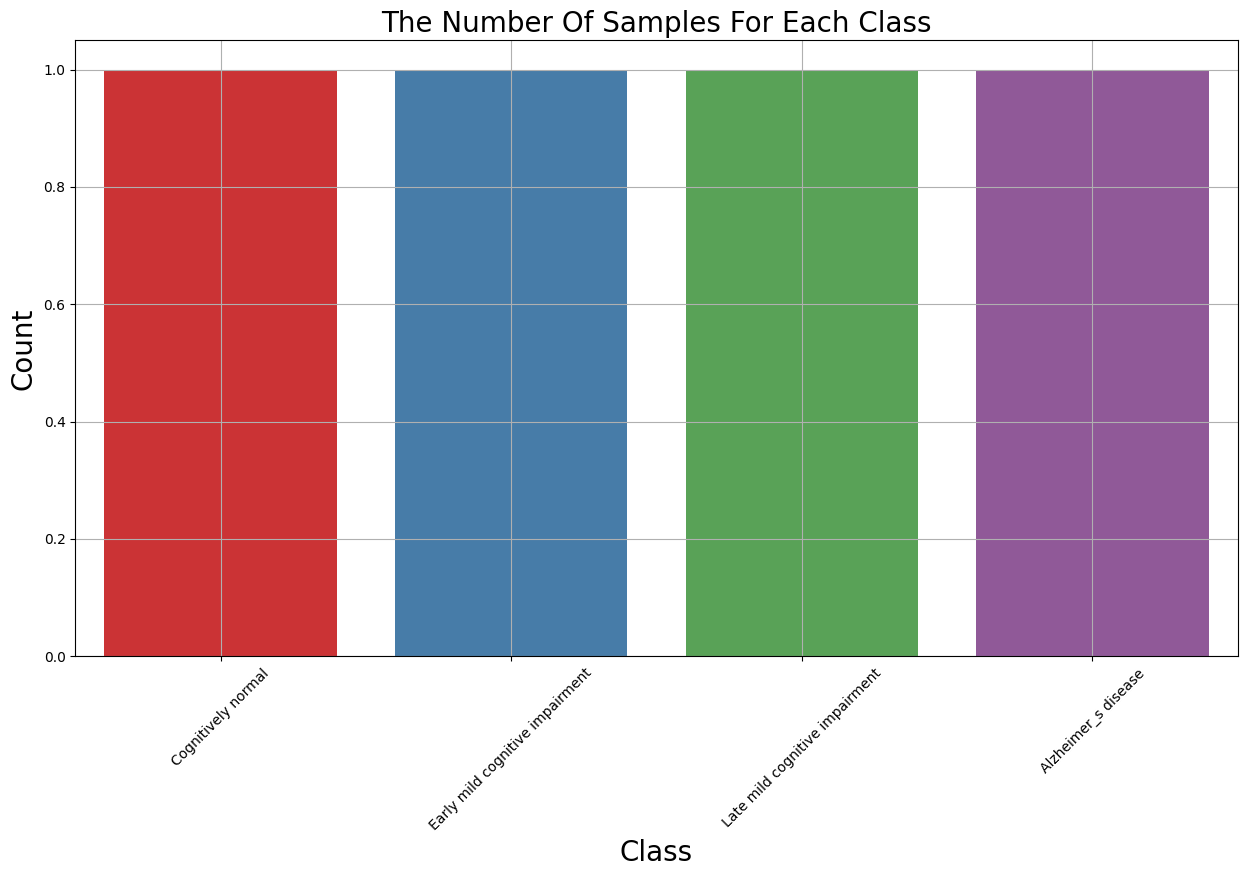

In [9]:
# Convert train_labels to a numpy array
train_labels_array = np.argmax(train_labels, axis=1)

# Convert train_labels_array to a pandas Series
train_labels_series = pd.Series(train_labels_array)

# Extract unique class numbers
unique_class_nums = train_labels_series.unique()

# Convert unique_class_nums back to a list
unique_class_nums_list = unique_class_nums.tolist()

# Map class numbers to corresponding class labels
labels = [class_num[i] for i in unique_class_nums_list]

# Plot the count of samples for each class
plt.figure(figsize=(15, 8))
ax = sns.countplot(x=labels, palette='Set1', order=labels)
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.title('The Number Of Samples For Each Class', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [10]:
X_train, X_test1, y_train, y_test1 = train_test_split(train_data,train_labels, test_size=0.3, random_state=42,shuffle=True,stratify=train_labels)
X_val, X_test, y_val, y_test = train_test_split(X_test1,y_test1, test_size=0.5, random_state=42,shuffle=True,stratify=y_test1)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('X_val shape is ' , X_val.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)
print('y_val shape is ' , y_val.shape)

X_train shape is  (8960, 176, 176, 3)
X_test shape is  (1920, 176, 176, 3)
X_val shape is  (1920, 176, 176, 3)
y_train shape is  (8960, 4)
y_test shape is  (1920, 4)
y_val shape is  (1920, 4)


In [11]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(176,176,3)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2),strides=2,padding='same'))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Conv2D(128,kernel_size=(3,3),strides=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPool2D((2,2),2,padding='same'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 88, 88, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 44, 44, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

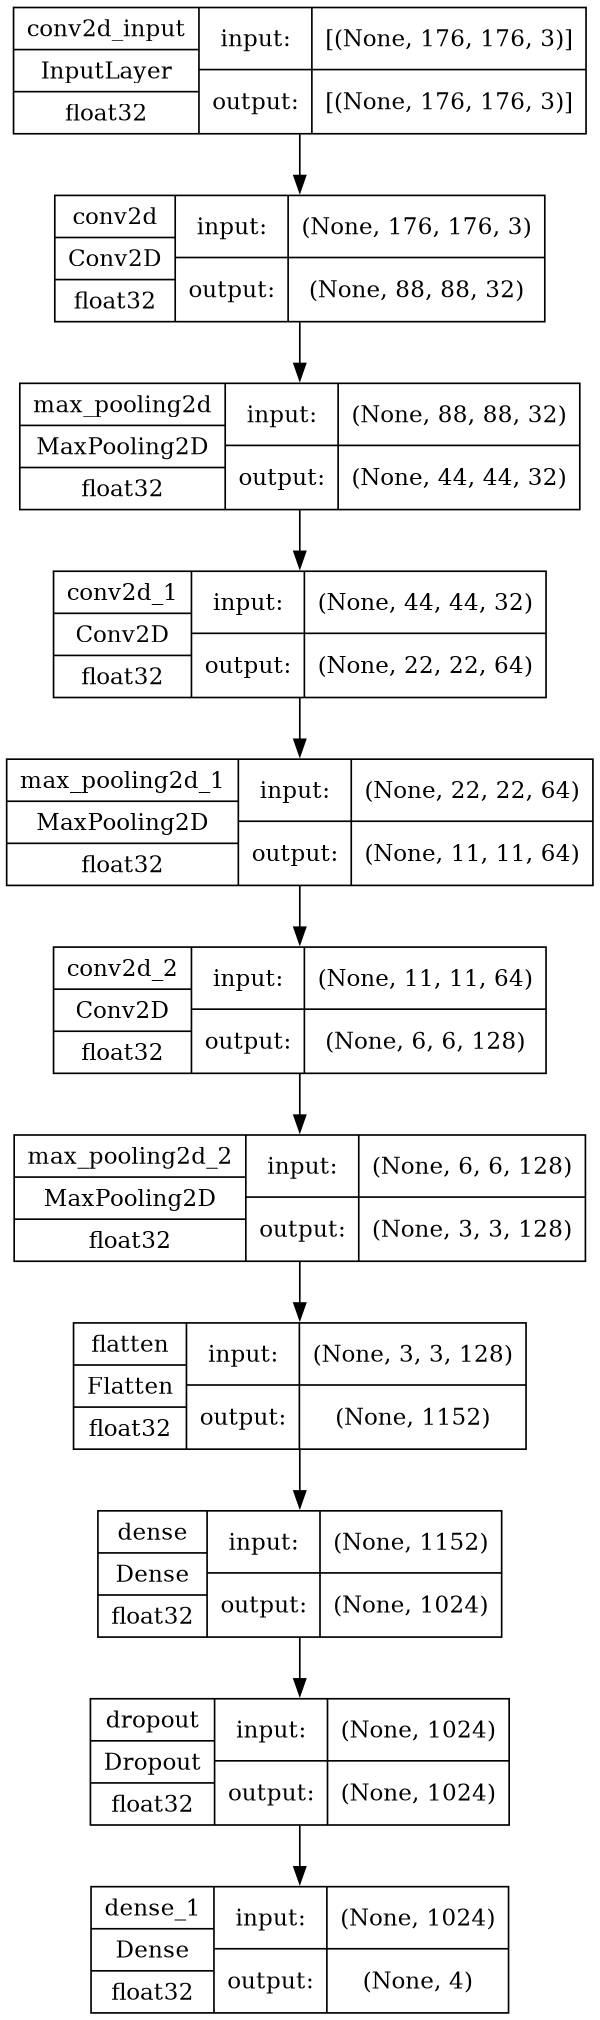

In [12]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=120)

In [13]:
# checkpoint_cb =ModelCheckpoint("CNN_model.h5", save_best_only=True) 
checkpoint_cb =ModelCheckpoint("CNN_model.keras", save_best_only=True)
early_stopping_cb =EarlyStopping(patience=10, restore_best_weights=True)
model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train,y_train, epochs=21, validation_data=(X_val,y_val), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/21
280/280 [==============================] - 41s 140ms/step - loss: 0.9063 - accuracy: 0.5624 - val_loss: 0.6547 - val_accuracy: 0.6589
Epoch 2/21
280/280 [==============================] - 37s 133ms/step - loss: 0.4809 - accuracy: 0.7868 - val_loss: 0.4228 - val_accuracy: 0.8089
Epoch 3/21
280/280 [==============================] - 36s 130ms/step - loss: 0.3007 - accuracy: 0.8727 - val_loss: 0.3033 - val_accuracy: 0.8745
Epoch 4/21
280/280 [==============================] - 37s 131ms/step - loss: 0.2010 - accuracy: 0.9154 - val_loss: 0.1762 - val_accuracy: 0.9370
Epoch 5/21
280/280 [==============================] - 35s 127ms/step - loss: 0.1458 - accuracy: 0.9432 - val_loss: 0.1521 - val_accuracy: 0.9333
Epoch 6/21
280/280 [==============================] - 35s 126ms/step - loss: 0.0791 - accuracy: 0.9711 - val_loss: 0.1041 - val_accuracy: 0.9630
Epoch 7/21
280/280 [==============================] - 35s 124ms/step - loss: 0.0604 - accuracy: 0.9768 - val_loss: 0.0975 - val_ac

In [ ]:
#evaluating model

In [14]:
hist_=pd.DataFrame(hist.history)
hist_

loss  accuracy  val_loss  val_accuracy
0   0.906339  0.562388  0.654702      0.658854
1   0.480921  0.786830  0.422787      0.808854
2   0.300720  0.872656  0.303310      0.874479
3   0.200974  0.915402  0.176236      0.936979
4   0.145816  0.943192  0.152136      0.933333
5   0.079097  0.971094  0.104132      0.963021
6   0.060441  0.976786  0.097546      0.965104
7   0.060622  0.978460  0.114226      0.959375
8   0.054474  0.979911  0.096067      0.965625
9   0.031296  0.988616  0.169741      0.939583
10  0.035076  0.987165  0.069120      0.976562
11  0.030519  0.989062  0.066739      0.976042
12  0.026787  0.989844  0.092521      0.972396
13  0.035652  0.985714  0.094513      0.967708
14  0.030529  0.988951  0.166155      0.959896
15  0.026639  0.991406  0.056476      0.980208
16  0.010636  0.996317  0.051523      0.982813
17  0.022796  0.991518  0.126836      0.965104
18  0.041056  0.985603  0.074689      0.973958
19  0.012597  0.994866  0.036368      0.988542
20  0.022215  0.992746  0.072187      0.976562

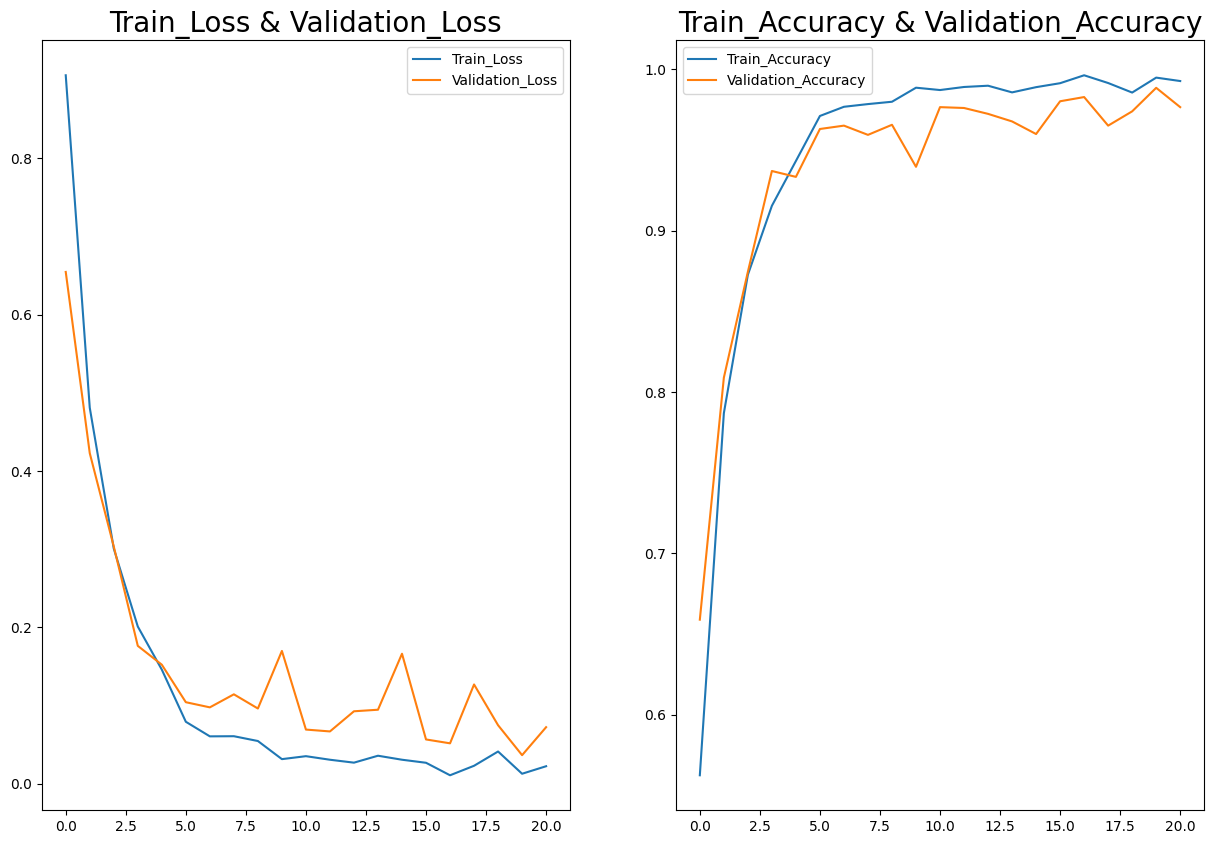

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()
plt.show()

In [16]:
score, acc= model.evaluate(X_test,y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

60/60 [==============================] - 2s 35ms/step - loss: 0.0972 - accuracy: 0.9719
Test Loss = 0.09721255302429199
Test Accuracy = 0.971875011920929


In [17]:
predictions = model.predict(X_test)
y_pred = np.argmax(predictions,axis=1)
y_test_ = np.argmax(y_test,axis=1)
df = pd.DataFrame({'Actual': y_test_, 'Prediction': y_pred})
df

60/60 [==============================] - 2s 34ms/step


Actual  Prediction
0          1           1
1          1           1
2          0           0
3          2           2
4          2           2
...      ...         ...
1915       2           2
1916       0           0
1917       2           2
1918       3           3
1919       3           3

[1920 rows x 2 columns]

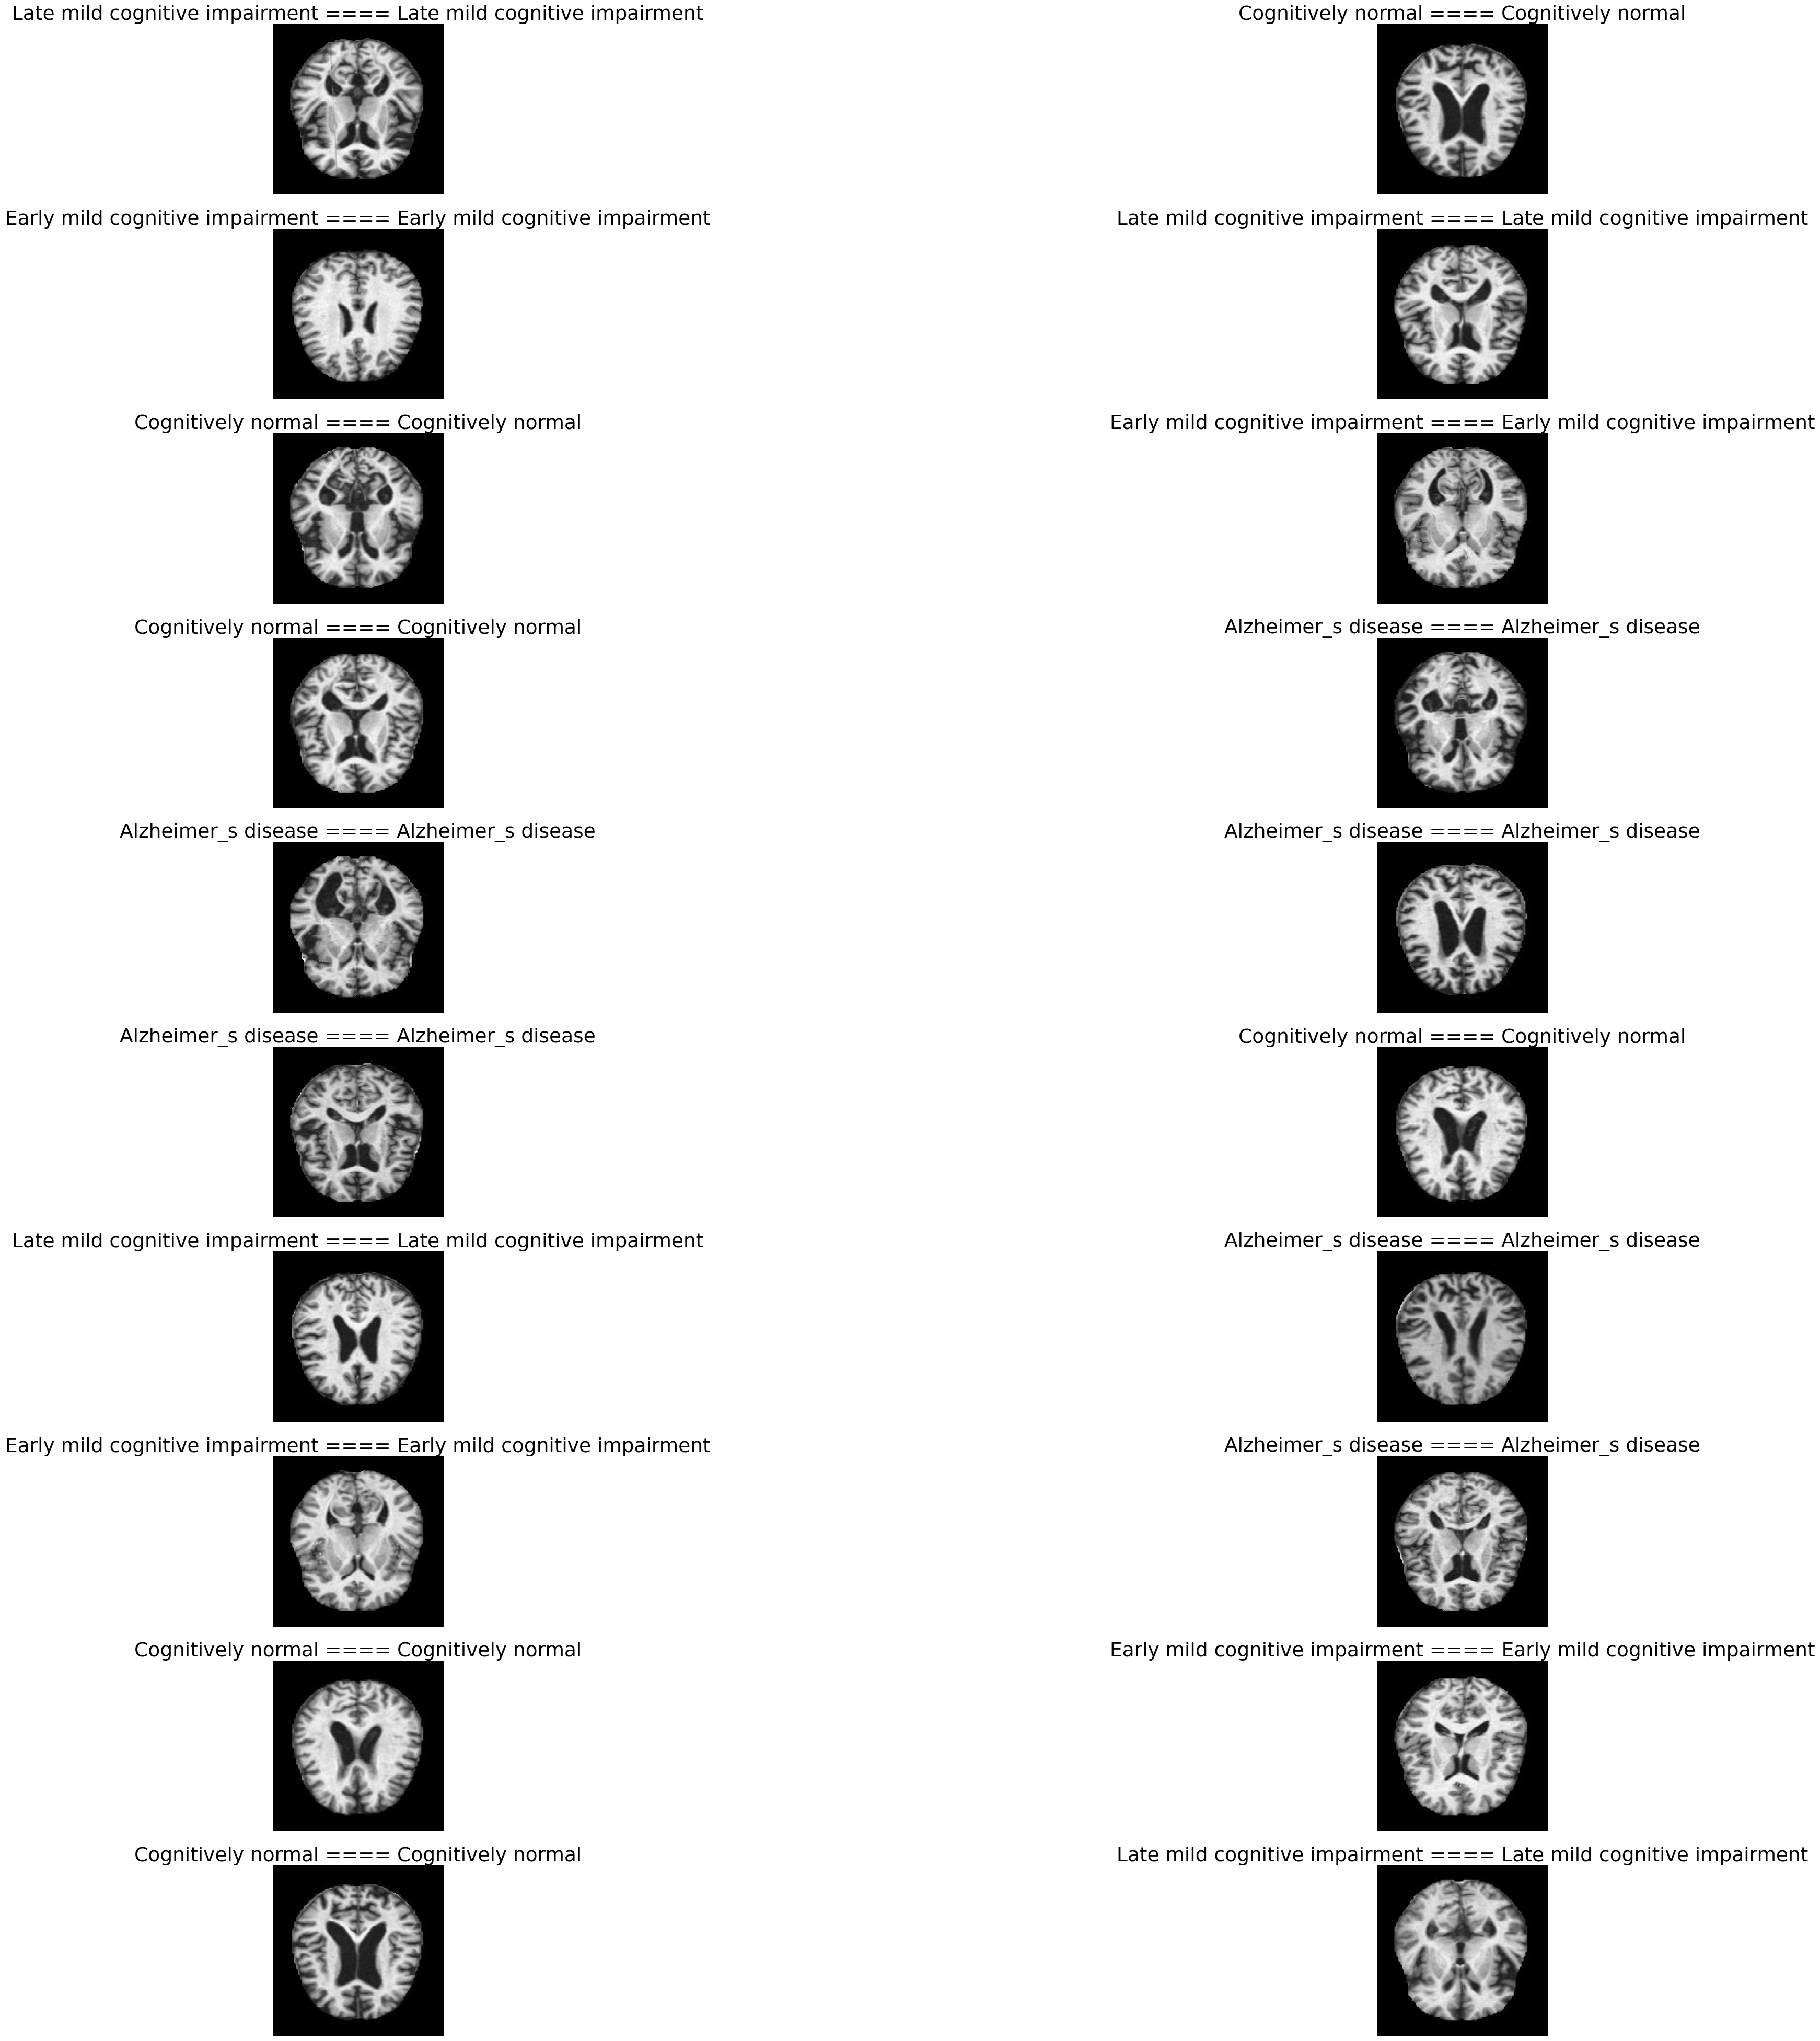

In [18]:
plt.figure(figsize=(50,50))
for n,i in enumerate(np.random.randint(0,len(X_test),20)):
    plt.subplot(10,2,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(f'{class_num[y_test_[i]]} ==== {class_num[y_pred[i]]}',fontsize=27)

In [19]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.99      0.98       480
           1       1.00      1.00      1.00       480
           2       0.94      0.97      0.96       480
           3       0.98      0.92      0.95       480

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.97      0.97      0.97      1920



array([[477,   0,   1,   2],
       [  0, 480,   0,   0],
       [  3,   0, 468,   9],
       [  9,   0,  30, 441]])

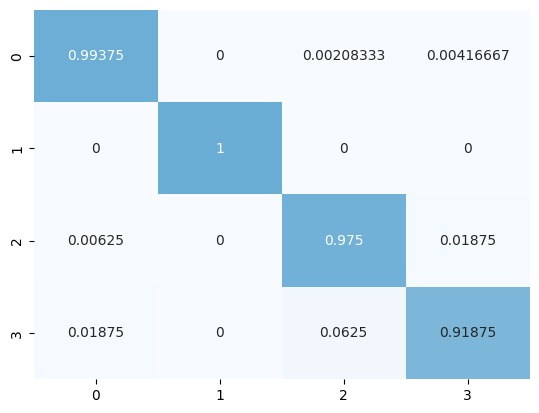

In [20]:
CM = confusion_matrix(y_test_,y_pred)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
sns.heatmap(CM_percent,fmt='g',center = True,cbar=False,annot=True,cmap='Blues')
CM

In [21]:
ClassificationReport = classification_report(y_test_,y_pred)
print('Classification Report is : ', ClassificationReport )

Classification Report is :                precision    recall  f1-score   support

           0       0.98      0.99      0.98       480
           1       1.00      1.00      1.00       480
           2       0.94      0.97      0.96       480
           3       0.98      0.92      0.95       480

    accuracy                           0.97      1920
   macro avg       0.97      0.97      0.97      1920
weighted avg       0.97      0.97      0.97      1920



In [22]:
model.save("Alzehmeir_Disease.keras")  # Save the entire model to a single HDF5 file

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
model_config_list = {
    'config': {
        'name': 'image_classification',
        'base_path': "D:\\Chrome Download's\\Alzehmeir_Disease",
        'model_platform': 'tensorflow',
        'model_version_policy': {'all': {}}
    }
}
